## Customer churn prediction

In [1]:
import pandas as pd

In [42]:
df = pd.read_csv(r"C:\Users\punam\Downloads\archive (7)\Churn_Modelling.csv")

In [43]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [44]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
cate_cols = [col for col in df.columns if df[col].dtype == 'object']

In [46]:
cate_cols

['Surname', 'Geography', 'Gender']

In [47]:
num_cols =[col for col in df.columns if df[col].dtype in ['int64','float64']]

In [48]:
num_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [49]:
x = df.drop('Exited',axis =1 )
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [50]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [51]:
x= df

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state= 42)

In [55]:
from sklearn.compose import ColumnTransformer

In [56]:
preprocess =  ColumnTransformer( [('num',StandardScaler(),num_cols),('cat',OneHotEncoder(handle_unknown='ignore'),cate_cols)])

In [57]:
preprocess

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['RowNumber', 'CustomerId', 'CreditScore',
                                  'Age', 'Tenure', 'Balance', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember',
                                  'EstimatedSalary', 'Exited']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Surname', 'Geography', 'Gender'])])

In [58]:
x_train = preprocess.fit_transform(x_train)

In [59]:
x_test = preprocess.transform(x_test)

In [60]:
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

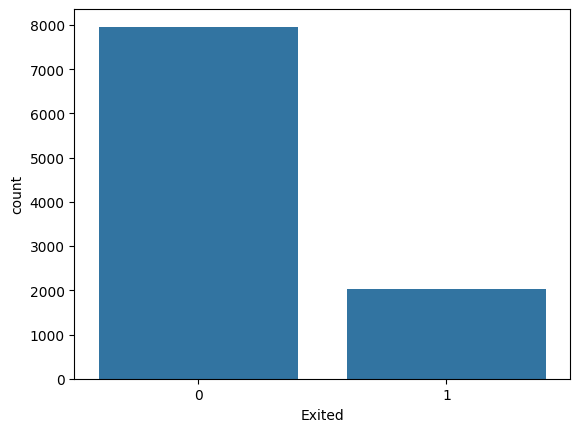

In [62]:
sns.countplot(x='Exited',data = df)

In [63]:
corr_matrix = df[num_cols].corr()

In [64]:
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


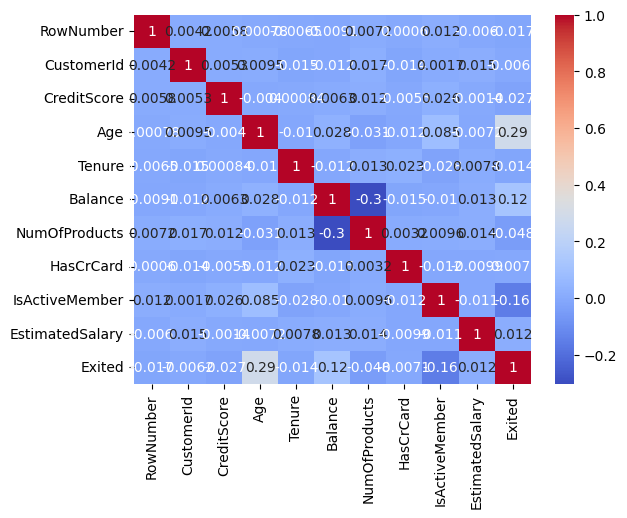

In [65]:
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression(random_state = 42)
lr

LogisticRegression(random_state=42)

In [68]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [69]:
y_pred = lr.predict (x_test)

In [70]:
from sklearn.metrics import classification_report,roc_auc_score

In [71]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1607\n           1       1.00      1.00      1.00       393\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n'

In [72]:
roc_auc_score(y_test,y_pred)

1.0

In [73]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [74]:
rf = RandomForestClassifier()

In [75]:
rf

RandomForestClassifier()

In [76]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
y_pred_rf = rf.predict(x_test)

In [80]:
classification_report(y_test,y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1607\n           1       1.00      1.00      1.00       393\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n'

In [81]:
roc_auc_score(y_test,y_pred_rf)

1.0

In [82]:
gb=  GradientBoostingClassifier(random_state = 42)

In [83]:
gb

GradientBoostingClassifier(random_state=42)

In [84]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [85]:
gb

GradientBoostingClassifier(random_state=42)

In [86]:
y_pre = gb.predict(x_test)

In [88]:
roc_auc_score(y_test,y_pre)

1.0

In [89]:
classification_report(y_test,y_pre)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1607\n           1       1.00      1.00      1.00       393\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n'